# SKLearn v. R - Comparisons on an Auto dataset.
Firstly we'll import the Auto.csv file via pandas and take a look at the data.
We'll start by printing the first few rows via the head() function and then output the dimensions of the data.

## 1) Reading the data

In [1]:
import pandas as pd

df = pd.read_csv('Auto.csv')
print(df.head()) #display first few rows
print("\n", df.shape) # Display dimensions of dataframe

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

 (392, 9)


## 2) Data Exploration
Next we'll want to take a closer look at the mpg, weight and year columns. We'll do this via the .describe method.

In [2]:
# subset the columns to run .describe()
col_mpg = df[['mpg']]
col_weight = df[['weight']]
col_year = df[['year']]

print(col_mpg.describe(), '\n')
print(col_weight.describe(), '\n')
print(col_year.describe())

              mpg
count  392.000000
mean    23.445918
std      7.805007
min      9.000000
25%     17.000000
50%     22.750000
75%     29.000000
max     46.600000 

            weight
count   392.000000
mean   2977.584184
std     849.402560
min    1613.000000
25%    2225.250000
50%    2803.500000
75%    3614.750000
max    5140.000000 

             year
count  390.000000
mean    76.010256
std      3.668093
min     70.000000
25%     73.000000
50%     76.000000
75%     79.000000
max     82.000000


So as we can see from .describe(), we can deduce the following.
- MPG average is approximately 23.446 miles per gallon. It's range is [9, 46] or 37 mpg.
- The average weight is approximately 2,977.584 lbs. It's range is [1613, 5140] or 3,527 lbs.
- The average year of the car model is approximately 76.010. It's range is [70, 82] or 12 years.

In [3]:
# setting values for future reference
avg_mpg = 23.445918
avg_weight = 2977.584184
avg_year = 76.010256

## 3) Datatype exploration
Next, we'll want to explore the datatypes of our columns.

In [4]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object


We want to change our cylinder and origin columns to be a categorical datatype. We'll change cylinder via cat.codes and we'll do the origin column without cat.codes.

In [5]:
df1 = df.copy()
df1.cylinders = df1.cylinders.astype('category').cat.codes
print(df1.dtypes, "\n")
print(df1.head(), "\n")

# w/out cat.code.
df2 = df1.copy()
df2.origin = df1.origin.astype('category')
print(df2.dtypes, "\n")
print(df2.head())


mpg             float64
cylinders          int8
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object 

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          4         307.0         130    3504          12.0  70.0   
1  15.0          4         350.0         165    3693          11.5  70.0   
2  18.0          4         318.0         150    3436          11.0  70.0   
3  16.0          4         304.0         150    3433          12.0  70.0   
4  17.0          4         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino   

mpg              float64
cylinders           int8
displacement     float64


## 4) Dealing with NAs
We'll detect any NAs in our data and replace with the average value for the respective column.

In [6]:
df2.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

We have two columns with NAs, acceleration and year. We'll purge those rows to get a cleaner data set.

In [7]:
df3 = df2.copy()
df3 = df3.dropna()
print('\n Dimensions of dropped NA rows:', df3.shape, '\n', df3.dtypes)


 Dimensions of dropped NA rows: (389, 9) 
 mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


## 5) Modify Columns
Compare mpg values with the average mpg. If mpg > mpg_average, then assign value to '1' in new categorical mpg column, mpg_high.

In [8]:
import numpy as np #we'll need this later

mpgList = df3["mpg"].tolist()
mpgList = list(np.array(mpgList, dtype=float))
mpgListHigh = list()


for i in range(0, len(mpgList)):
    if mpgList[i] > avg_mpg:
        mpgListHigh.append(1)
    else:
        mpgListHigh.append(0)

df4 = df3.copy()
# create mpg_high col
df4.insert(loc = 1, column= 'mpg_high', value= mpgListHigh)
# categorize mpg_high
df4.mpg_high = df4.mpg_high.astype('category')

#deleting mpg and name column

del df4['mpg']
del df4['name']
print(df4.head())

  mpg_high  cylinders  displacement  horsepower  weight  acceleration  year  \
0        0          4         307.0         130    3504          12.0  70.0   
1        0          4         350.0         165    3693          11.5  70.0   
2        0          4         318.0         150    3436          11.0  70.0   
3        0          4         304.0         150    3433          12.0  70.0   
6        0          4         454.0         220    4354           9.0  70.0   

  origin  
0      1  
1      1  
2      1  
3      1  
6      1  


## 6) Data exploration w/ graphs
We'll plot the data of the new dataframe with seaborn

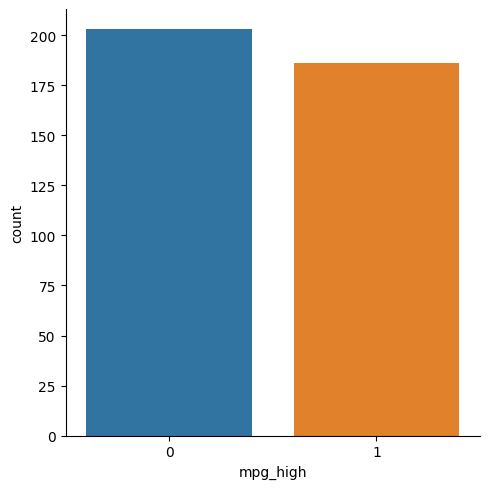

In [20]:
import seaborn as sb
sb.catplot(x="mpg_high", kind = 'count', data= df4) 

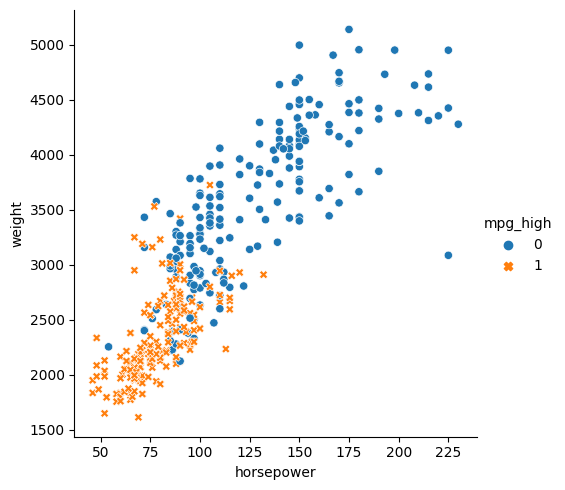

In [21]:
sb.relplot(x="horsepower", y="weight", data= df4, hue=df4.mpg_high, style=df4.mpg_high)

<AxesSubplot: xlabel='mpg_high', ylabel='weight'>

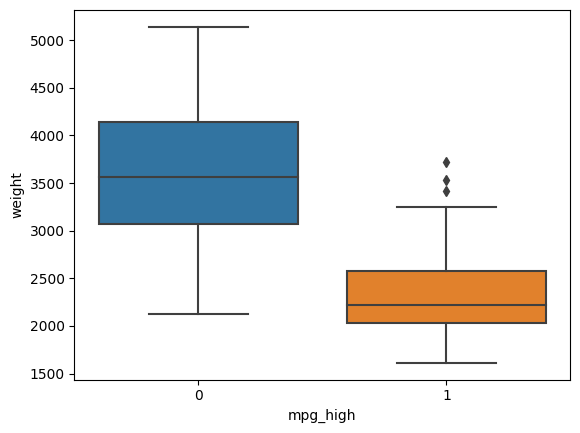

In [22]:
sb.boxplot(x='mpg_high', y='weight', data = df4)

Findings from the plots:
1. The amount of cars in the dataset is pretty evenly split across cars that get a high mpg and a low mpg, with a difference of around 10 to 15 cars swinging towards being less gas efficient.
2. High mpg vehicles seem to have lower horsepower than the lower mpg vehicles.
3. High mpg vehicles weigh less than low mpg vehicles, which makes sense as one would need more force to push a heavier load.

## 7) Train/Test

In [26]:
from sklearn.model_selection import train_test_split
#print(df4.head())
x = df4.iloc[:,np.r_[2:8]]
y = df4.mpg_high

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)
print('train shape:', x_train.shape)
print('test shape', x_test.shape)

train shape: (311, 6)
test shape (78, 6)


## 8) Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

#prediction
predlr = lr.predict(x_test)

print(classification_report(y_test, predlr))

print('accuracy score: ', accuracy_score(y_test, predlr))

confusion_matrix(y_test, predlr)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.75      0.96      0.84        28

    accuracy                           0.87        78
   macro avg       0.86      0.89      0.87        78
weighted avg       0.89      0.87      0.87        78

accuracy score:  0.8717948717948718


array([[41,  9],
       [ 1, 27]])

## 9) Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

#predictions
preddt = dt.predict(x_test)
#eval
print(classification_report(y_test, preddt))
print('accuracy score: ', accuracy_score(y_test, preddt))
confusion_matrix(y_test, preddt)

              precision    recall  f1-score   support

           0       0.98      0.86      0.91        50
           1       0.79      0.96      0.87        28

    accuracy                           0.90        78
   macro avg       0.89      0.91      0.89        78
weighted avg       0.91      0.90      0.90        78

accuracy score:  0.8974358974358975


array([[43,  7],
       [ 1, 27]])

## 10) Neural Networks

In [58]:
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

scaler = preprocessing.StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


nnlb = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4, 2), max_iter=1500, random_state=1234)
nnlb.fit(x_train_scaled, y_train)
prednnlb = nnlb.predict(x_test_scaled)
print('accuracy = ', accuracy_score(y_test, prednnlb))
confusion_matrix(y_test, prednnlb)
print(classification_report(y_test, prednnlb))

## New settings
nn2 = MLPClassifier(solver='sgd', hidden_layer_sizes=(8,), max_iter = 1500, random_state = 1234)
nn2.fit(x_train_scaled, y_train)
prednn2 = nn2.predict(x_test_scaled)
print('accuracy of nn2 = ', accuracy_score(y_test, prednn2))
confusion_matrix(y_test, prednn2)
print(classification_report(y_test, prednn2))

accuracy =  0.8974358974358975
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        50
           1       0.83      0.89      0.86        28

    accuracy                           0.90        78
   macro avg       0.89      0.90      0.89        78
weighted avg       0.90      0.90      0.90        78

accuracy of nn2 =  0.8846153846153846
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        50
           1       0.76      1.00      0.86        28

    accuracy                           0.88        78
   macro avg       0.88      0.91      0.88        78
weighted avg       0.91      0.88      0.89        78



The separated layer in the first neural network slightly outperformed the second one that used one big layer with as many nodes as there are columns/predictors in the data. Based on the network organization, separating nodes into layers will give us better results because we are able to caputre other relationships other than strictly linear ones. Though we run the risk of overfitting our data this way.

## 11) Conclusions/Analysis
The algorithm that performed best was the first neural network and the decision tree with an accuracy of  0.8974358974358975

LogReg stats: accuracy: 0.8717948717948718, recall: 0.86, precsion: 0.89
DT stats: accuracy: 0.8974358974358975, recall: 0.91, precsion: 0.89
NN1 stats: accuracy: 0.8974358974358975, recall: 0.90, precsion: 0.89
NN2 stats: accuracy: 0.8846153846153846, recall: 0.91, precsion: 0.88

Since the accuracy scores were the same for the decison tree and the first neural network, my guess is that the networking layer of nodes for the NN1 mimicked the decision tree behavior too much or just overfit the data too drastically.

R v. Python is an interesting one. I feel like the fluidity of the IDEs performances on my laptop is far smoother by importing a python library than using R. I really enjoy R, but my inexperience with it has me confused whenever I use certain functions. I feel like numpy, pandas and sklearn methods are somehow easier to understand and unpack. I find both very pleasant tools, but I feel like I would get more done with python.